In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
bs = 128
defaults.cmap='binary'

In [5]:
path = untar_data(URLs.MNIST); path

PosixPath('/home/peter/.fastai/data/mnist_png')

In [6]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='training', valid='testing', ds_tfms=tfms, 
                                  size=28, bs=bs).normalize()

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


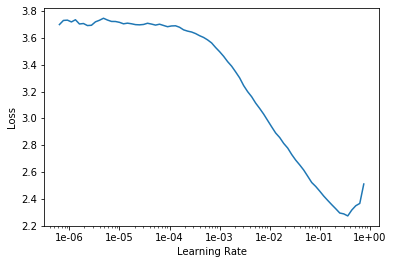

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(1, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.146500,0.086542,0.972100,00:17


In [10]:
learn.save('stage-1')
# export the model for inference
learn_export_file_name = 'stage-1-export.pkl'
learn.export(learn_export_file_name)
# Export the minimal state of the data bunch for inference 
data_export_file_name = 'data-export.pkl'
data.export(data_export_file_name)

In [11]:
import shutil
here = Path('.')
# copy the export files from fastai default to here
for file_name in [learn_export_file_name, data_export_file_name]:
    shutil.copyfile(path/file_name, here/file_name)
# quick list to see what we copied
here.ls()

[PosixPath('stage-1-export.pkl'),
 PosixPath('mnist-training.ipynb'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('data-export.pkl'),
 PosixPath('mnist-inference.ipynb')]